In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

%matplotlib inline
seed=42

In [2]:
df = pd.read_csv('./CourseResources/FINAL_TF2_FILES/TF_2_Notebooks_and_Data/DATA/kc_house_data.csv')

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df.isnull().sum() # No missing data

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


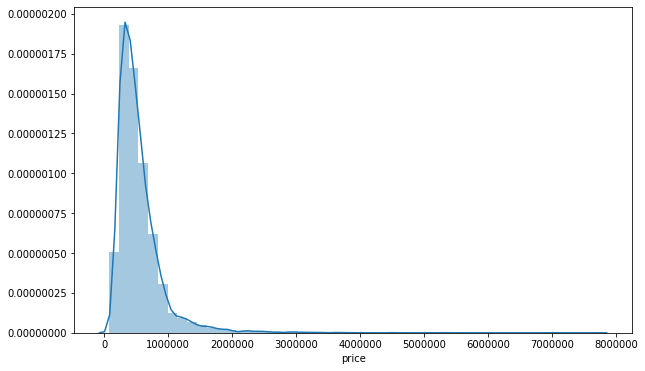

In [6]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

In [7]:
# There are outliers in our analysis, it is right-skwed

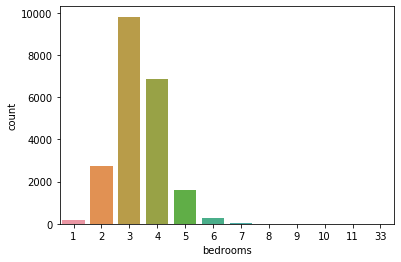

In [8]:
sns.countplot(df['bedrooms']) # Majority in 2-5 bedrooms

In [9]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

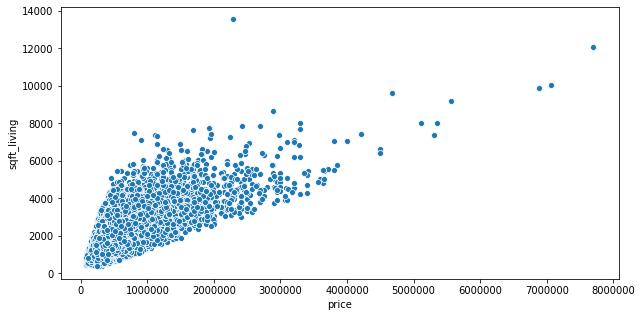

In [10]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price', y='sqft_living', data=df)

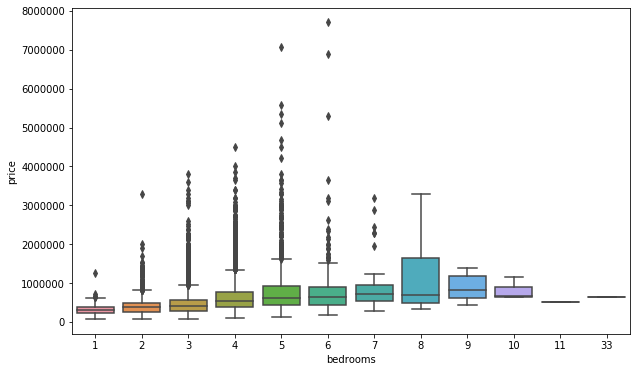

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms', y='price', data=df)

In [12]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

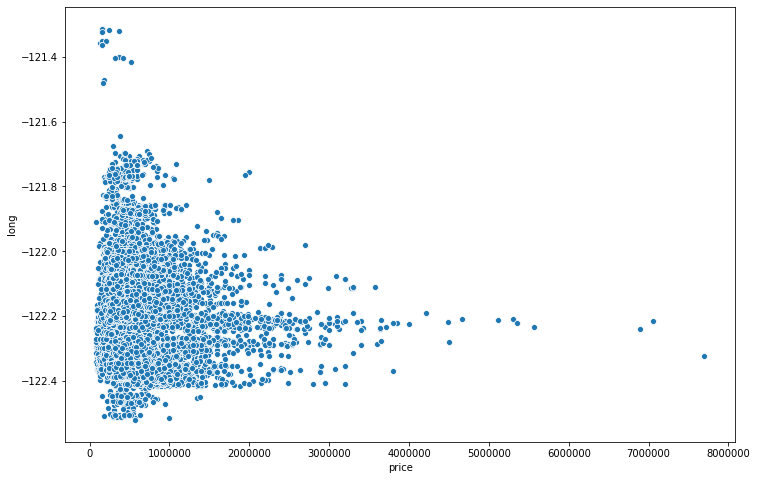

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='long', data=df)

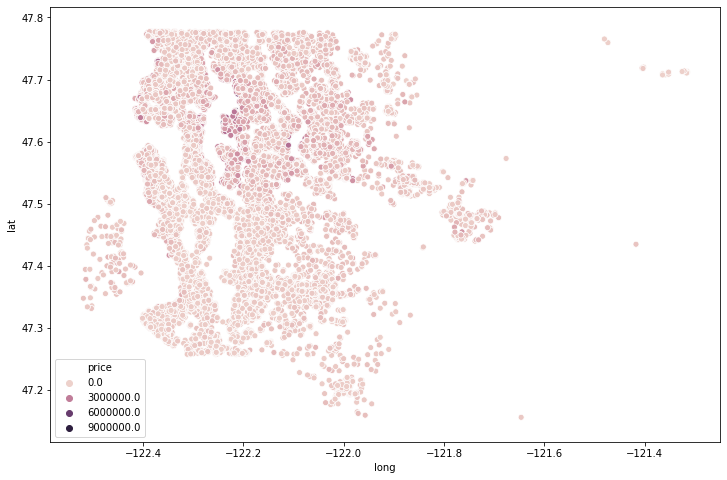

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data = df, hue='price' )

In [15]:
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [16]:
len(df)

21597

In [17]:
# Top 1% means 215
non_top_1_percent = df.sort_values('price', ascending=False).iloc[216:,:]

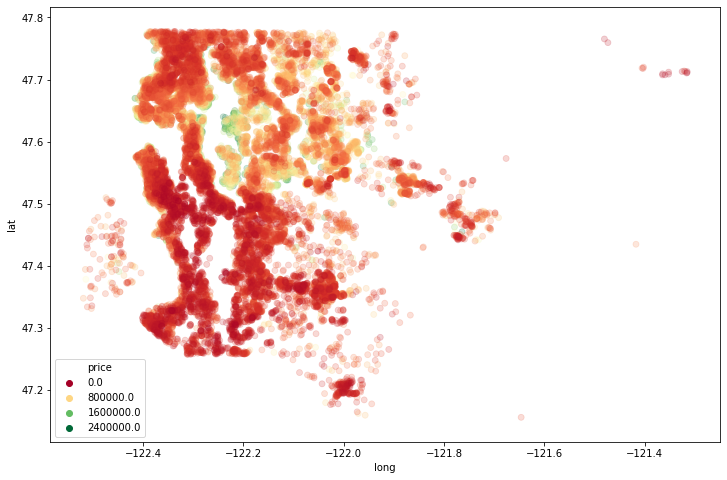

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=non_top_1_percent, hue='price', edgecolor=None, alpha=0.2, palette='RdYlGn')

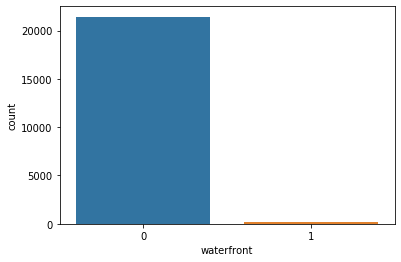

In [19]:
sns.countplot(x='waterfront', data=df)

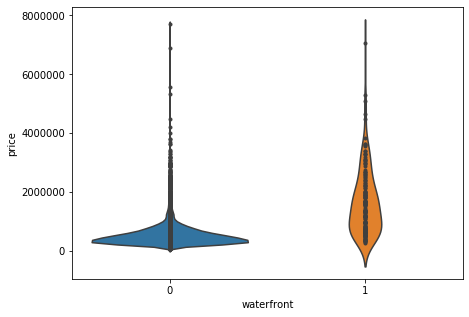

In [20]:
plt.figure(figsize=(7,5))
sns.violinplot(x='waterfront',y='price', data=df, inner='points')

In [21]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
df = df.drop('id', axis=1)

In [23]:
df['date'] = pd.to_datetime(df['date'])

In [24]:
df['year'] = df['date'].apply(lambda date: date.year)

In [25]:
df['year']

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21592    2014
21593    2015
21594    2014
21595    2015
21596    2014
Name: year, Length: 21597, dtype: int64

In [26]:
df['month'] = df['date'].apply(lambda date: date.month)

In [27]:
df['month']

0        10
1        12
2         2
3        12
4         2
         ..
21592     5
21593     2
21594     6
21595     1
21596    10
Name: month, Length: 21597, dtype: int64

In [28]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


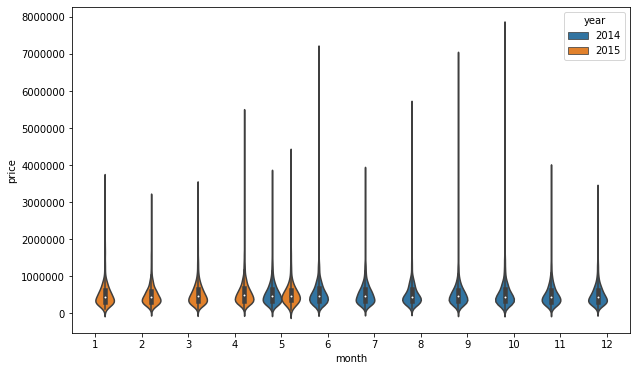

In [29]:
plt.figure(figsize=(10,6))
sns.violinplot(x='month', y='price',hue='year' ,data=df)

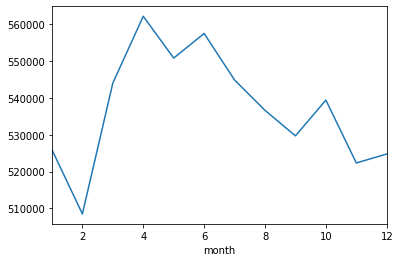

In [30]:
df.groupby('month')['price'].mean().plot()

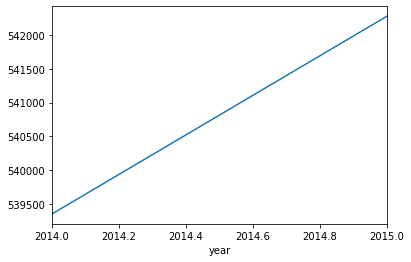

In [31]:
df.groupby('year')['price'].mean().plot()

In [32]:
df = df.drop('date', axis=1)

In [33]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [34]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
year               int64
month              int64
dtype: object

In [35]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [36]:
# As 70 zip code is toomuch, we can delete it (but we can also use it)

In [37]:
df = df.drop('zipcode', axis=1)

In [38]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [39]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [40]:
20683/len(df) # Most of the year it is 0 (i.e. never renovated), so lets make it renovated or not renovated

0.9576793073112007

In [41]:
df['is_renovated'] = df['yr_renovated'].apply(lambda year:0 if(year==0) else 1)

In [42]:
df['is_renovated'].value_counts()

0    20683
1      914
Name: is_renovated, dtype: int64

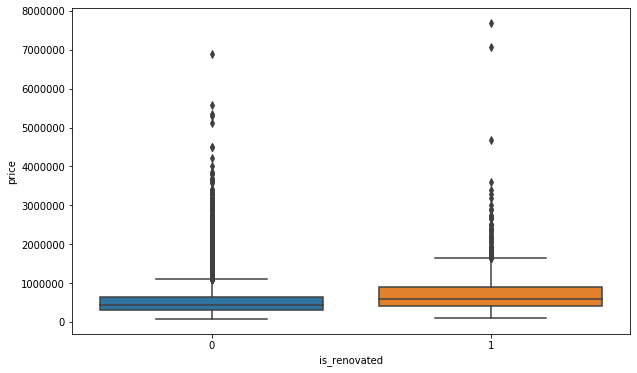

In [43]:
plt.figure(figsize=(10,6))
sns.boxplot(x='is_renovated', y='price', data=df)

In [44]:
df['sqft_basement'].value_counts() # 0 mean no basement, so less value

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [45]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [46]:
X.shape, y.shape

((21597, 20), (21597,))

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler()

In [51]:
X_train = scaler.fit_transform(X_train)

In [52]:
X_test = scaler.fit_transform(X_test)

In [53]:
X_train.shape

(15117, 20)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [55]:
model = Sequential()
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))

model.add(Dense(1))
model.compile(optimizer = 'adam', loss='mse')

In [56]:
model.fit(x=X_train, y=y_train, 
          validation_data = (X_test, y_test),
         batch_size = 128,
         epochs = 400) # Also adding validation dataset

#Batch sizes are usually in power of 2, the smaller the batch size the longer training will take

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 1s 43us/sample - loss: 429750189861.0698 - val_loss: 420111858457.9161
Epoch 2/400
15117/15117 [==============================] - 0s 9us/sample - loss: 429058033909.3482 - val_loss: 417631703232.1581
Epoch 3/400
15117/15117 [==============================] - 0s 9us/sample - loss: 417716632368.7885 - val_loss: 391466950716.6815
Epoch 4/400
15117/15117 [==============================] - 0s 9us/sample - loss: 356619740117.3926 - val_loss: 290510923851.8519
Epoch 5/400
15117/15117 [==============================] - 0s 9us/sample - loss: 216410113652.7131 - val_loss: 141565993384.7704
Epoch 6/400
15117/15117 [==============================] - 0s 8us/sample - loss: 111970089874.6026 - val_loss: 95921459533.7482
Epoch 7/400
15117/15117 [==============================] - 0s 8us/sample - loss: 97636245279.2443 - val_loss: 93202882944.3161
Epoch 8/400
15117/15117 [=========================

15117/15117 [==============================] - 0s 8us/sample - loss: 38725149459.6610 - val_loss: 44131531930.2321
Epoch 65/400
15117/15117 [==============================] - 0s 8us/sample - loss: 38471864642.5698 - val_loss: 42942824336.7506
Epoch 66/400
15117/15117 [==============================] - 0s 8us/sample - loss: 38257472856.8557 - val_loss: 42929967579.3383
Epoch 67/400
15117/15117 [==============================] - 0s 8us/sample - loss: 38031335094.5209 - val_loss: 42951194548.1481
Epoch 68/400
15117/15117 [==============================] - 0s 8us/sample - loss: 37804732788.7639 - val_loss: 43729194836.0691
Epoch 69/400
15117/15117 [==============================] - 0s 8us/sample - loss: 37606757040.8986 - val_loss: 43002055571.2790
Epoch 70/400
15117/15117 [==============================] - 0s 8us/sample - loss: 37439732784.8393 - val_loss: 43084406885.1358
Epoch 71/400
15117/15117 [==============================] - 0s 8us/sample - loss: 37247987986.0692 - val_loss: 432022

Epoch 128/400
15117/15117 [==============================] - 0s 8us/sample - loss: 32361912157.7668 - val_loss: 41427171333.0568
Epoch 129/400
15117/15117 [==============================] - 0s 8us/sample - loss: 32276123240.2154 - val_loss: 42604824166.4000
Epoch 130/400
15117/15117 [==============================] - 0s 8us/sample - loss: 32236276920.5191 - val_loss: 42731791832.8099
Epoch 131/400
15117/15117 [==============================] - 0s 8us/sample - loss: 32208042475.6108 - val_loss: 43804459989.0173
Epoch 132/400
15117/15117 [==============================] - 0s 8us/sample - loss: 32158790628.8369 - val_loss: 41814620428.0099
Epoch 133/400
15117/15117 [==============================] - 0s 8us/sample - loss: 32106243227.0530 - val_loss: 43280022095.6444
Epoch 134/400
15117/15117 [==============================] - 0s 8us/sample - loss: 32051056160.8869 - val_loss: 43973313371.6543
Epoch 135/400
15117/15117 [==============================] - 0s 8us/sample - loss: 32068688916.05

15117/15117 [==============================] - 0s 8us/sample - loss: 30660244323.4568 - val_loss: 41815270326.6765
Epoch 192/400
15117/15117 [==============================] - 0s 8us/sample - loss: 30679660858.4412 - val_loss: 41617014177.1852
Epoch 193/400
15117/15117 [==============================] - 0s 8us/sample - loss: 30634289230.9829 - val_loss: 41596322125.7481
Epoch 194/400
15117/15117 [==============================] - 0s 8us/sample - loss: 30620563938.9741 - val_loss: 41407993244.1284
Epoch 195/400
15117/15117 [==============================] - 0s 8us/sample - loss: 30590386631.6079 - val_loss: 40742024169.2444
Epoch 196/400
15117/15117 [==============================] - 0s 8us/sample - loss: 30587765166.8156 - val_loss: 42668467895.3086
Epoch 197/400
15117/15117 [==============================] - 0s 8us/sample - loss: 30570000949.1068 - val_loss: 41032727180.3259
Epoch 198/400
15117/15117 [==============================] - 0s 8us/sample - loss: 30521408895.4666 - val_loss:

15117/15117 [==============================] - 0s 8us/sample - loss: 29696541879.0289 - val_loss: 38896340294.1630
Epoch 255/400
15117/15117 [==============================] - 0s 8us/sample - loss: 29700499823.8190 - val_loss: 39301681991.4272
Epoch 256/400
15117/15117 [==============================] - 0s 8us/sample - loss: 29692087695.4528 - val_loss: 39369755943.8222
Epoch 257/400
15117/15117 [==============================] - 0s 8us/sample - loss: 29698550672.9769 - val_loss: 40065295802.4691
Epoch 258/400
15117/15117 [==============================] - 0s 8us/sample - loss: 29641502534.1261 - val_loss: 40557621258.1136
Epoch 259/400
15117/15117 [==============================] - 0s 8us/sample - loss: 29661978899.9659 - val_loss: 39286617449.5605
Epoch 260/400
15117/15117 [==============================] - 0s 8us/sample - loss: 29655793433.8252 - val_loss: 39352393647.0914
Epoch 261/400
15117/15117 [==============================] - 0s 8us/sample - loss: 29693335518.8760 - val_loss:

15117/15117 [==============================] - 0s 8us/sample - loss: 28998140235.2403 - val_loss: 38000000670.0247
Epoch 318/400
15117/15117 [==============================] - 0s 8us/sample - loss: 29016778445.1455 - val_loss: 38404042762.1136
Epoch 319/400
15117/15117 [==============================] - 0s 8us/sample - loss: 28996568930.0343 - val_loss: 38762331168.8691
Epoch 320/400
15117/15117 [==============================] - 0s 8us/sample - loss: 28970386611.1001 - val_loss: 38224998187.6148
Epoch 321/400
15117/15117 [==============================] - 0s 8us/sample - loss: 28980811518.4590 - val_loss: 38722792925.8667
Epoch 322/400
15117/15117 [==============================] - 0s 8us/sample - loss: 29005679238.4944 - val_loss: 39007121630.4988
Epoch 323/400
15117/15117 [==============================] - 0s 8us/sample - loss: 28904837348.1426 - val_loss: 37601732077.0370
Epoch 324/400
15117/15117 [==============================] - 0s 8us/sample - loss: 28922754293.1449 - val_loss:

15117/15117 [==============================] - 0s 8us/sample - loss: 28341044006.8987 - val_loss: 37601246068.9383
Epoch 381/400
15117/15117 [==============================] - 0s 8us/sample - loss: 28428051931.5229 - val_loss: 37158174295.2296
Epoch 382/400
15117/15117 [==============================] - 0s 8us/sample - loss: 28320507359.7566 - val_loss: 36696442450.1728
Epoch 383/400
15117/15117 [==============================] - 0s 8us/sample - loss: 28326855670.5844 - val_loss: 36938448036.3457
Epoch 384/400
15117/15117 [==============================] - 0s 8us/sample - loss: 28299721495.3189 - val_loss: 37090703021.1951
Epoch 385/400
15117/15117 [==============================] - 0s 8us/sample - loss: 28314069120.8383 - val_loss: 38398069135.4864
Epoch 386/400
15117/15117 [==============================] - 0s 8us/sample - loss: 28335981960.5435 - val_loss: 37663300822.9136
Epoch 387/400
15117/15117 [==============================] - 0s 8us/sample - loss: 28280819125.0137 - val_loss:

In [58]:
losses = pd.DataFrame(model.history.history)

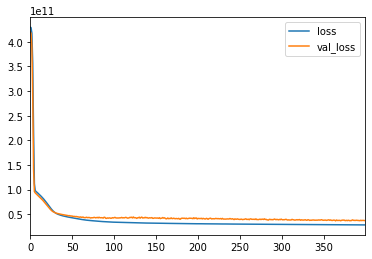

In [59]:
losses.plot()

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [62]:
predictions = model.predict(X_test)

In [65]:
np.sqrt(mean_squared_error(y_test, predictions))

191805.87712278945

In [66]:
mean_absolute_error(y_test, predictions)

114038.74296031057

In [67]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [68]:
5.402966e+05 # we are off by about 20%, so not so good

540296.6

In [69]:
explained_variance_score(y_test, predictions)

0.7225654580487575

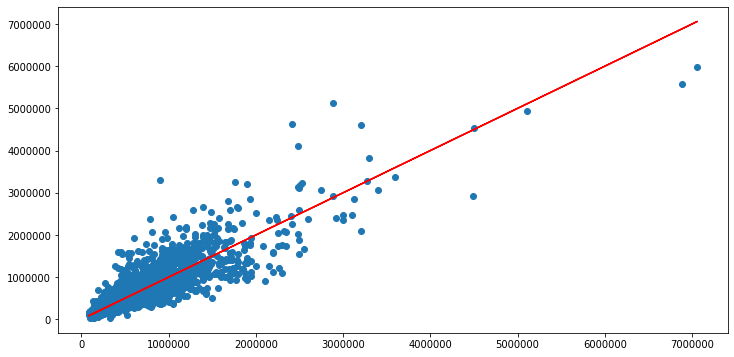

In [78]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

In [79]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,is_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,47.5112,-122.257,1340,5650,2014,10,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,47.7210,-122.319,1690,7639,2014,12,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,47.7379,-122.233,2720,8062,2015,2,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,47.5208,-122.393,1360,5000,2014,12,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,47.6168,-122.045,1800,7503,2015,2,0


In [84]:
single_house = df.drop('price',axis=1).iloc[0,:] 

In [86]:
single_house.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01,  0.00000e+00])

In [88]:
single_house.values.reshape(-1,20)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01,  0.00000e+00]])

In [89]:
single_house = scaler.transform(single_house.values.reshape(-1,20))

In [90]:
single_house

array([[0.0625    , 0.03571429, 0.07995846, 0.00433007, 0.        ,
        0.        , 0.        , 0.5       , 0.33333333, 0.09112426,
        0.        , 0.47826087, 0.        , 0.56720299, 0.215     ,
        0.13085938, 0.00582059, 0.        , 0.81818182, 0.        ]])

In [91]:
model.predict(single_house)

array([[255049.7]], dtype=float32)

In [93]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,is_renovated
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,...,0,1955,0,47.5112,-122.257,1340,5650,2014,10,0
